<a href="https://colab.research.google.com/github/OsvaldoFloresC/OsvaldoFloresC/blob/main/PolinomioInterpolanteDNewton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**El Polinomio interpolante de Newton** es una forma de encontrar el polinomio que pasa por un conjunto de puntos dados, utilizando diferencias divididas.
Este polinomio pasará por todos los puntos dados y es una forma útil de encontrar la interpolación polinómica.


Diferencias Divididas: Se calculan utilizando una tabla, comenzando por los valores dados y luego calculando sucesivamente las diferencias entre los puntos.
\begin{array}{c|c|c|c|c|c|c}
x & y=F(x) & \Delta y & \Delta^{2} y & \Delta^{3} y \\
\hline
0 & -5 & 6 & 2 & 6  \\
1 & 1 & 8 & 8 & 6  \\
2 & 9 & 16 & 14 & 6   \\
3 & 25 & 30 & 20 &  \\
4 & 55 & 50 &   &  \\
5 & 105 &   &   &  \\
\end{array}


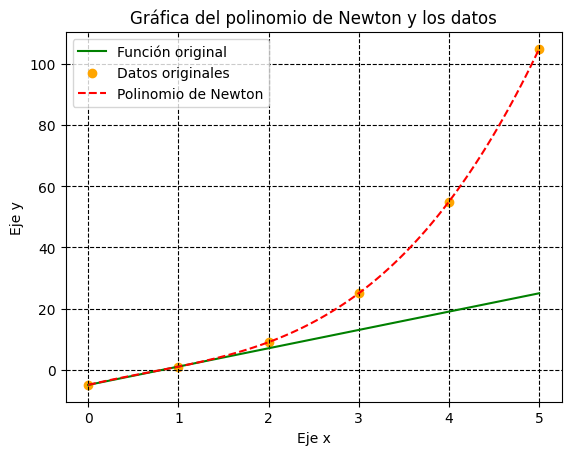

El valor del polinomio de Newton en x = 3 es: 25.0


In [10]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x*3 - 2*x*2 + 7*x - 5

# Datos de la tabla
x = np.array([0, 1, 2, 3, 4, 5])  # Valores de x
F = np.array([-5, 1, 9, 25, 55, 105])  # Valores de y=F(x)

# Cálculo de las diferencias divididas
def diferencias_divididas(x, F):
    n = len(x)
    # Crear una matriz para almacenar las diferencias divididas
    tabla = np.zeros((n, n))
    tabla[:, 0] = F  # Colocar los valores de F(x) en la primera columna

    # Calcular las diferencias divididas
    for j in range(1, n):
        for i in range(n - j):
            tabla[i, j] = (tabla[i + 1, j - 1] - tabla[i, j - 1]) / (x[i + j] - x[i])

    return tabla

# Evaluación del polinomio de Newton en un valor x dado
def polinomio_newton(x_dado, x, tabla):
    n = len(x)
    resultado = tabla[0, 0]
    p = 1
    for i in range(1, n):
        p *= (x_dado - x[i - 1])
        resultado += tabla[0, i] * p
    return resultado

# Construcción de la tabla de diferencias divididas
tabla = diferencias_divididas(x, F)

# Graficar los datos originales
x1 = np.linspace(0, 5, 100)
plt.plot(x1, f(x1), label='Función original', color='green')  # Graficar f(x)
plt.scatter(x, F, color="orange", marker='o', label='Datos originales')  # Graficar los puntos de la tabla
plt.title("Gráfica del polinomio de Newton y los datos")
plt.xlabel("Eje x")
plt.ylabel("Eje y")
plt.grid(color="black", linestyle="--")
plt.grid(True)

# Graficar el polinomio de Newton evaluado en los puntos x1
y_newton = np.array([polinomio_newton(xi, x, tabla) for xi in x1])
plt.plot(x1, y_newton, label='Polinomio de Newton', color='red', linestyle='--')

# Mostrar la leyenda
plt.legend()
plt.show()

# Evaluar el polinomio en un punto dado, por ejemplo x=2.5
x_dado = 3
resultado = polinomio_newton(x_dado, x, tabla)
print(f"El valor del polinomio de Newton en x = {x_dado} es: {resultado}")

Al ejemplificar $x=3$ en el Polinomio de Newton \
tenemos $f(x)= x^{3} - 2x^{2} + 7x - 5 = 25$ con lo cual podemos confirmar en la grafica que el polinomio interpolante pasa por los puntos.